In [1]:
from IPython.core.display import HTML
with open('style.css', 'r') as file:
    css = file.read()
HTML(css)

# The 8-Queens Problem

The <a href="https://en.wikipedia.org/wiki/Eight_queens_puzzle">eight queens puzzle</a> is the problem of placing eight chess queens on a chessboard so that no two queens can capture each other.  In <a href="https://en.wikipedia.org/wiki/Chess">chess</a> a queen can capture another piece if this piece is either
<ol>
    <li>in the same row,</li>
    <li>in the same column, or</li>
    <li>in the same diagonal.</li>
</ol>
The image below shows a queen in row 3, column 4.  All the locations where a piece can be captured by this queen are marked with an arrow.

<img src="queen-captures.png">

We will solve this puzzle by encoding it as a *constrant satisfaction problem*.
- The set of values is $\{1,\cdots,8\}$.  These values are interpreted as columns.
- We will use 8 variables $Q_1$, $\cdots$, $Q_8$.  If $Q_i = j$, then the interpretation 
  is that there is a queen at the position $(i, j)$, i.e. the queen in row $i$ is 
  placed in column $j$. 
- The condition 
  $$ \bigl\{ \texttt{Q}_i \not= \texttt{Q}_j \bigm| 
      i \in \{1,\cdots,8\} \wedge j \in \{1,\cdots,8\} \wedge j < i \bigr\} 
  $$
  specifies that there is at most on queen in a given column.
- The condition
  $$ \bigl\{ |i  - j| \not= |\texttt{Q}_i - \texttt{Q}_j| \bigm| 
     i \in \{1,\cdots,8\} \wedge j \in \{1,\cdots,8\} \wedge j < i \bigr\}
  $$
  specifies that there is at most one queen in a given diagonal.

In [2]:
def queens_CSP():
        "Returns a CSP coding the 8 queens problem."
        S                  = range(1, 8+1)          # used as indices
        Variables          = { f'Q{i}' for i in S }
        Values             = { 1, 2, 3, 4, 5, 6, 7, 8 }
        DifferentRows      = { f'Q{i} != Q{j}' for i in S for j in S if i < j }
        DifferentDiagonals = { f'abs(Q{i}-Q{j}) != {j-i}' for i in S for j in S if i < j }
        return Variables, Values, DifferentRows | DifferentDiagonals

In [4]:
%run Backtracking-Constraint-Solver.ipynb

Next, we create a *CSP* that encodes the *8-queens-puzzle*.

In [3]:
CSP = queens_CSP()
CSP

({'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'},
 {1, 2, 3, 4, 5, 6, 7, 8},
 {'Q1 != Q2',
  'Q1 != Q3',
  'Q1 != Q4',
  'Q1 != Q5',
  'Q1 != Q6',
  'Q1 != Q7',
  'Q1 != Q8',
  'Q2 != Q3',
  'Q2 != Q4',
  'Q2 != Q5',
  'Q2 != Q6',
  'Q2 != Q7',
  'Q2 != Q8',
  'Q3 != Q4',
  'Q3 != Q5',
  'Q3 != Q6',
  'Q3 != Q7',
  'Q3 != Q8',
  'Q4 != Q5',
  'Q4 != Q6',
  'Q4 != Q7',
  'Q4 != Q8',
  'Q5 != Q6',
  'Q5 != Q7',
  'Q5 != Q8',
  'Q6 != Q7',
  'Q6 != Q8',
  'Q7 != Q8',
  'abs(Q1-Q2) != 1',
  'abs(Q1-Q3) != 2',
  'abs(Q1-Q4) != 3',
  'abs(Q1-Q5) != 4',
  'abs(Q1-Q6) != 5',
  'abs(Q1-Q7) != 6',
  'abs(Q1-Q8) != 7',
  'abs(Q2-Q3) != 1',
  'abs(Q2-Q4) != 2',
  'abs(Q2-Q5) != 3',
  'abs(Q2-Q6) != 4',
  'abs(Q2-Q7) != 5',
  'abs(Q2-Q8) != 6',
  'abs(Q3-Q4) != 1',
  'abs(Q3-Q5) != 2',
  'abs(Q3-Q6) != 3',
  'abs(Q3-Q7) != 4',
  'abs(Q3-Q8) != 5',
  'abs(Q4-Q5) != 1',
  'abs(Q4-Q6) != 2',
  'abs(Q4-Q7) != 3',
  'abs(Q4-Q8) != 4',
  'abs(Q5-Q6) != 1',
  'abs(Q5-Q7) != 2',
  'abs(Q5-Q8) != 3',
  'ab

This *CSP* has 8 variables and 56 constraints.  When we solved the same problem using propositional logic and the *Davis-Putnam algorithm*, we had used 64 propositional variables and 512 clauses.

In [5]:
len(CSP[0]), len(CSP[2])

(8, 56)

On my desktop computer (2017 iMac with 3.4 GHz Quad-Core Intel i5) it takes about 45 ms to solve the problem. 

In [6]:
%%time
Solution = solve(CSP)
Solution

Wall time: 5 ms


{'Q5': 1, 'Q7': 2, 'Q1': 3, 'Q3': 4, 'Q8': 5, 'Q6': 6, 'Q2': 8, 'Q4': 7}

In [7]:
import chess

This function takes a solution and displays it as a chess board with n queens using the library `python-chess`.

In [8]:
def show_solution(Solution):
    board = chess.Board(None)  # create empty chess board
    queen = chess.Piece(chess.QUEEN, True)
    for row in range(1, 8+1):
        for col in range(1, 8+1):
            field_number = (row - 1) * 8 + col - 1
            if Solution['Q' + str(row)] == col:
                board.set_piece_at(field_number, queen)
    display(board)

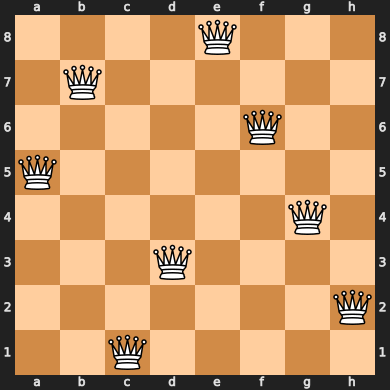

In [9]:
show_solution(Solution)